In [13]:
from bs4 import BeautifulSoup
import httpx

In [2]:
import pandas as pd

In [19]:
"""
Output DataFrame must have following columns, 
[
    'URL_ID', 
    'URL', 
    'POSITIVE SCORE',
    'NEGATIVE SCORE',
    'POLARITY SCORE',
    'SUBJECTIVITY SCORE',
    'AVG SENTENCE LENGTH',
    'PERCENTAGE OF COMPLEX WORDS',
    'FOG INDEX',
    'AVG NUMBER OF WORDS PER SENTENCE',
    'COMPLEX WORD COUNT', 
    'WORD COUNT',
    'SYLLABLE PER WORD', 
    'PERSONAL PRONOUNS', 
    'AVG WORD LENGTH'
]
"""

pass

In [8]:
df = pd.read_excel("../Input.xlsx")

In [9]:
df.head()

,URL_ID,URL
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...
4,Netclan20241021,https://insights.blackcoffer.com/development-o...


In [11]:
df.URL[0]

'https://insights.blackcoffer.com/ai-and-ml-based-youtube-analytics-and-content-creation-tool-for-optimizing-subscriber-engagement-and-content-strategy/'

b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>AI and ML-Based YouTube Analytics and Content Creation Tool for Optimizing Subscriber Engagement and Content Strategy - Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\t<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>\n\t\n\t<!-- This site is optimized with the Yoast SEO plugin v24.1 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<link rel="canonical" href="https://insights.blackcoffer.com/ai-and-ml-based-youtube
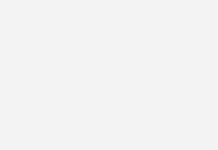
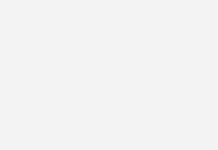
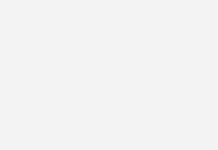
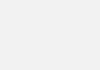
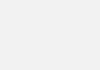
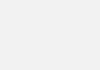
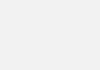
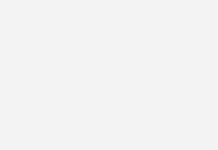
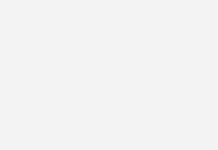
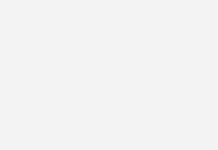
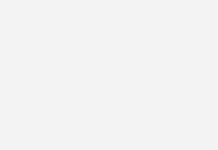

In [26]:
html = httpx.get(df.URL[0])
html.content

In [27]:
soup = BeautifulSoup(html.content, 'html.parser')

In [41]:
# Article title
title = soup.find('h1', class_="entry-title").text
title

'AI and ML-Based YouTube Analytics and Content Creation Tool for Optimizing Subscriber Engagement and Content Strategy'

In [43]:
# Article Text
article_text = soup.find('div', class_="td-post-content").text
print(article_text)


Client BackgroundClient: A leading IT & tech firm in the USAIndustry Type: ITProducts & Services: IT Consulting, IT Support, SaaS, Marketing StrategyOrganization Size: 10+The ProblemBuilding AI and ML based YouTube analytics and content creation tool that will help youtuber to understand their subscriber’s watching behaviour, help them in content research, creation and publication. Our SolutionCreated a MERN stack web application and integrated AI models to helps youtuber to generated titles, descriptions, tags, hashtags, captions etc. Help them to check thumbnail quality, analysis on the videos using video auditor tool, analysis on comments using sentiments analysis, help to under their subscribers using churn predication AI model. Solution Architecture
https://www.figma.com/file/WQs01mmmNBZ1SjNE2IV8Sl/Youtube-Web-App-By-SHiV?type=design&node-id=0-1&mode=design&t=Lh2jRx4bGQq6l4WU-0
DeliverablesWeb ApplicationsSupportsMaintenance Feature EnhancementTech StackTools used
VS code
Languag

In [51]:
def data_crawling(url: str) -> str:
    """
        Following function send request to given url and extract 2 useful info
        Article title and Article text

        str, eg. title$text

        resultant string will be seperated by delimeter '$'
    """
    html = httpx.get(url)
    soup = BeautifulSoup(html, "html.parser")

    # Article title
    title = soup.find('h1', class_="entry-title").text

    # Article text
    article_text = soup.find('div', class_="td-post-content").text

    return title.strip() + "$" + article_text.strip()

In [52]:
s = data_crawling(df.URL[0]).split("$", maxsplit=1)
title = s[0]
text = s[1]

In [53]:
text

'Client BackgroundClient:\xa0A leading IT & tech firm in the USAIndustry Type:\xa0ITProducts & Services:\xa0IT Consulting, IT Support, SaaS, Marketing StrategyOrganization Size:\xa010+The ProblemBuilding AI and ML based YouTube analytics and content creation tool that will help youtuber to understand their subscriber’s watching behaviour, help them in content research, creation and publication.\xa0Our SolutionCreated a MERN stack web application and integrated AI models to helps youtuber to generated titles, descriptions, tags, hashtags, captions etc. Help them to check thumbnail quality, analysis on the videos using video auditor tool, analysis on comments using sentiments analysis, help to under their subscribers using churn predication AI model.\xa0Solution Architecture\nhttps://www.figma.com/file/WQs01mmmNBZ1SjNE2IV8Sl/Youtube-Web-App-By-SHiV?type=design&node-id=0-1&mode=design&t=Lh2jRx4bGQq6l4WU-0\nDeliverablesWeb ApplicationsSupportsMaintenance\xa0Feature EnhancementTech StackToo

In [56]:
extracted_data_df = (
    df
    .assign(
        crawled_data=lambda df_: (
            df_.URL.apply(data_crawling)
        )
    )
)

In [57]:
extracted_data_df.head()

,URL_ID,URL,crawled_data
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,ROAS Dashboard for Campaign-Wise Google Ads Bu...
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,Efficient Processing and Analysis of Financial...
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,Development of EA Robot for Automated Trading$...


In [149]:
df = (
  extracted_data_df
  .assign(
    ARTICLE_DATA=lambda df_: df_.crawled_data.str.replace("$", " ")
  )

  .drop(columns=['crawled_data'])
)

df.head()

,URL_ID,URL,ARTICLE_DATA
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,ROAS Dashboard for Campaign-Wise Google Ads Bu...
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,Efficient Processing and Analysis of Financial...
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,Development of EA Robot for Automated Trading ...


In [150]:
# Stopwords_auditor
with open("../StopWords/StopWords_Auditor.txt", "r") as sa:
    auditor_sw = [item.strip() for item in sa.readlines()]
    print(auditor_sw)

['ERNST', 'YOUNG', 'DELOITTE', 'TOUCHE', 'KPMG', 'PRICEWATERHOUSECOOPERS', 'PRICEWATERHOUSE', 'COOPERS']


In [151]:
# StopWords_currencies
with open("../StopWords/StopWords_Currencies.txt", "r", encoding='latin-1' ) as sc:
    currencies_sw = [i.strip() for item in sc.readlines() for i in item.split("|")]
    print(currencies_sw)


['AFGHANI', 'Afghanistan', 'ARIARY', 'Madagascar', 'BAHT', 'Thailand', 'BALBOA', 'Panama', 'BIRR', 'Ethiopia', 'BOLIVAR', 'Venezuela', 'BOLIVIANO', 'Bolivia', 'CEDI', 'Ghana', 'COLON', 'Costa Rica', 'CÓRDOBA', 'Nicaragua', 'DALASI', 'Gambia', 'DENAR', 'Macedonia (Former Yug. Rep.)', 'DINAR', 'Algeria', 'DIRHAM', 'Morocco', 'DOBRA', 'São Tom and Príncipe', 'DONG', 'Vietnam', 'DRAM', 'Armenia', 'ESCUDO', 'Cape Verde', 'EURO', 'Belgium', 'FLORIN', 'Aruba', 'FORINT', 'Hungary', 'GOURDE', 'Haiti', 'GUARANI', 'Paraguay', 'GULDEN', 'Netherlands Antilles', 'HRYVNIA', 'Ukraine', 'KINA', 'Papua New Guinea', 'KIP', 'Laos', 'KONVERTIBILNA MARKA', 'Bosnia-Herzegovina', 'KORUNA', 'Czech Republic', 'KRONA', 'Sweden', 'KRONE', 'Denmark', 'KROON', 'Estonia', 'KUNA', 'Croatia', 'KWACHA', 'Zambia', 'KWANZA', 'Angola', 'KYAT', 'Myanmar', 'LARI', 'Georgia', 'LATS', 'Latvia', 'LEK', 'Albania', 'LEMPIRA', 'Honduras', 'LEONE', 'Sierra Leone', 'LEU', 'Romania', 'LEV', 'Bulgaria', 'LILANGENI', 'Swaziland', 'LIR

In [152]:
# StopWords_DatesandNumbers
with open("../StopWords/StopWords_DatesandNumbers.txt", "r") as sdn:
    date_and_num_sw = [i.strip() for item in sdn.readlines() for i in item.split("|")]
    print(date_and_num_sw)

['HUNDRED', 'Denominations', 'THOUSAND', 'MILLION', 'BILLION', 'TRILLION', 'DATE', 'Time related', 'ANNUAL', 'ANNUALLY', 'ANNUM', 'YEAR', 'YEARLY', 'QUARTER', 'QUARTERLY', 'QTR', 'MONTH', 'MONTHLY', 'WEEK', 'WEEKLY', 'DAY', 'DAILY', 'JANUARY', 'Calendar', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'SEPT', 'OCT', 'NOV', 'DEC', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY', 'ONE', 'Numbers', 'TWO', 'THREE', 'FOUR', 'FIVE', 'SIX', 'SEVEN', 'EIGHT', 'NINE', 'TEN', 'ELEVEN', 'TWELVE', 'THIRTEEN', 'FOURTEEN', 'FIFTEEN', 'SIXTEEN', 'SEVENTEEN', 'EIGHTEEN', 'NINETEEN', 'TWENTY', 'THIRTY', 'FORTY', 'FIFTY', 'SIXTY', 'SEVENTY', 'EIGHTY', 'NINETY', 'FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH', 'SEVENTH', 'EIGHTH', 'NINTH', 'TENTH', 'I', 'Roman numerals', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII

In [153]:
# StopWords_Generic.txt
with open("../StopWords/StopWords_Generic.txt", "r") as sg:
    generic_sw = [item.strip() for item in sg.readlines()]
    print(generic_sw)

['ABOUT', 'ABOVE', 'AFTER', 'AGAIN', 'ALL', 'AM', 'AMONG', 'AN', 'AND', 'ANY', 'ARE', 'AS', 'AT', 'BE', 'BECAUSE', 'BEEN', 'BEFORE', 'BEING', 'BELOW', 'BETWEEN', 'BOTH', 'BUT', 'BY', 'CAN', 'DID', 'DO', 'DOES', 'DOING', 'DOWN', 'DURING', 'EACH', 'FEW', 'FOR', 'FROM', 'FURTHER', 'HAD', 'HAS', 'HAVE', 'HAVING', 'HE', 'HER', 'HERE', 'HERS', 'HERSELF', 'HIM', 'HIMSELF', 'HIS', 'HOW', 'IF', 'IN', 'INTO', 'IS', 'IT', 'ITS', 'ITSELF', 'JUST', 'ME', 'MORE', 'MOST', 'MY', 'MYSELF', 'NO', 'NOR', 'NOT', 'NOW', 'OF', 'OFF', 'ON', 'ONCE', 'ONLY', 'OR', 'OTHER', 'OUR', 'OURS', 'OURSELVES', 'OUT', 'OVER', 'OWN', 'SAME', 'SHE', 'SHOULD', 'SO', 'SOME', 'SUCH', 'THAN', 'THAT', 'THE', 'THEIR', 'THEIRS', 'THEM', 'THEMSELVES', 'THEN', 'THERE', 'THESE', 'THEY', 'THIS', 'THOSE', 'THROUGH', 'TO', 'TOO', 'UNDER', 'UNTIL', 'UP', 'VERY', 'WAS', 'WE', 'WERE', 'WHAT', 'WHEN', 'WHERE', 'WHICH', 'WHILE', 'WHO', 'WHOM', 'WHY', 'WITH', 'YOU', 'YOUR', 'YOURS', 'YOURSELF', 'YOURSELVES']


In [154]:
# StopWords_GenericLong
with open("../StopWords/StopWords_GenericLong.txt", "r") as sgl:
    generic_long_sw = [item.strip() for item in sgl.readlines()]
    print(generic_long_sw)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [155]:
# StopWords_Geographic
with open("../StopWords/StopWords_Geographic.txt", "r") as sge:
    geographic_sw = [i.strip() for item in sge.readlines() for i in item.split("|")]
    print(geographic_sw)

['UNITED', 'Geographic', 'STATE', 'NORTH', 'SOUTH', 'EAST', 'NORTHEAST', 'NORTHWEST', 'SOUTHEAST', 'SOUTHWEST', 'WEST', 'OCEAN', 'SEA', 'LAKE', 'RIVER', 'CREEK', 'GULF', 'MOUNTAIN', 'STREET', 'BOULEVARD', 'BLVD', 'PARKWAY', 'CITY', 'COUNTY', 'COUNTRY', 'PACIFIC', 'ATLANTIC', 'INDIAN', 'MEDITERRANEAN', 'COMMONWEALTH', 'AMERICA', 'AMERICAN', 'YORK', 'Cities', 'CHICAGO', 'LAS', 'VEGAS', 'LOS', 'ANGELES', 'MILWAUKEE', 'SUNNYVALE', 'FREMONT', 'CINCINNATI', 'PHILADELPHIA', 'MIAMI', 'DALLAS', 'FORT', 'BOSTON', 'HOUSTON', 'WASHINGTON', 'ATLANTA', 'DETROIT', 'SAN', 'FRANSICO', 'PHOENIX', 'SEATTLE', 'DIEGO', 'MINNEAPOLIS', 'MEMPHIS', 'DENVER', 'ST', 'LOUIS', 'PITTSBURGH', 'MANHATTAN', 'HOLLYWOOD', 'COLUMBUS', 'INDIANAPOLIS', 'MUMBAI', 'KARACHI', 'ONTARIO', 'TORONTO', 'CAMBRIDGE', 'DELHI', 'SAO', 'PAULO', 'SHANGHAI', 'MOSCOW', 'SEOUL', 'ISTANBUL', 'TOKYO', 'JAKARTA', 'BEIJING', 'LONDON', 'LUXEMBOURG', 'SINGAPORE', 'REPUBLIC', 'Countries', 'CHINA', 'INDIA', 'INDONESIA', 'BRAZIL', 'BRAZILIAN', 'PAK

In [156]:
# StopWords_Names
with open("../StopWords/StopWords_Names.txt", "r") as sn:
    names_sw = [item.split('|')[0].strip()
        for item in sn.readlines()
        if not any(keyword in item for keyword in ['http', 'www', '>']) ]
    print(names_sw)

['JOHNSON', 'WILLIAMS', 'JONES', 'BROWN', 'DAVIS', 'MILLER', 'WILSON', 'MOORE', 'TAYLOR', 'ANDERSON', 'THOMAS', 'JACKSON', 'WHITE', 'HARRIS', 'MARTIN', 'THOMPSON', 'GARCIA', 'MARTINEZ', 'ROBINSON', 'CLARK', 'RODRIGUEZ', 'LEWIS', 'LEE', 'WALKER', 'HALL', 'ALLEN', 'YOUNG', 'HERNANDEZ', 'KING', 'WRIGHT', 'LOPEZ', 'HILL', 'SCOTT', 'GREEN', 'ADAMS', 'BAKER', 'GONZALEZ', 'NELSON', 'CARTER', 'MITCHELL', 'PEREZ', 'ROBERTS', 'TURNER', 'PHILLIPS', 'CAMPBELL', 'PARKER', 'EVANS', 'EDWARDS', 'COLLINS', 'STEWART', 'SANCHEZ', 'MORRIS', 'ROGERS', 'REED', 'COOK', 'MORGAN', 'BELL', 'MURPHY', 'BAILEY', 'RIVERA', 'COOPER', 'RICHARDSON', 'COX', 'HOWARD', 'WARD', 'TORRES', 'PETERSON', 'GRAY', 'RAMIREZ', 'JAMES', 'WATSON', 'BROOKS', 'KELLY', 'SANDERS', 'PRICE', 'BENNETT', 'WOOD', 'BARNES', 'ROSS', 'HENDERSON', 'COLEMAN', 'JENKINS', 'PERRY', 'POWELL', 'LONG', 'PATTERSON', 'HUGHES', 'FLORES', 'WASHINGTON', 'BUTLER', 'SIMMONS', 'FOSTER', 'GONZALES', 'BRYANT', 'ALEXANDER', 'RUSSELL', 'GRIFFIN', 'DIAZ', 'HAYES', 

In [157]:
stopwords = auditor_sw + currencies_sw + date_and_num_sw + generic_sw + generic_long_sw + geographic_sw + names_sw

In [210]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [211]:
def cleaning(item: str):
    stopwords_removed = " ".join([s for s in item.split(" ") if s not in stopwords and s not in string.punctuation])
    return stopwords_removed

In [212]:
df['ARTICLE_DATA_rm_sw'] = df['ARTICLE_DATA'].str.lower().apply(cleaning)

In [213]:
with open("../MasterDictionary/positive-words.txt", "r") as pos:
    pos_words = [item.strip() for item in pos.readlines()]
    print(pos_words)

with open("../MasterDictionary/negative-words.txt", "r", encoding='latin-1') as pos:
    neg_words = [item.strip() for item in pos.readlines()]
    print(neg_words)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [214]:
pos_dict = []
neg_dict = []
neutral = []

In [260]:
def get_score(row: str) -> str:
    """
    take row text as input and return pos_score | neg_score | neutral_score
    """
    pos_dict = []
    neg_dict = []
    neutral = []

    for item in row.split(" "):
        if item in pos_words:
            pos_dict.append(item)
        elif item in neg_words:
            neg_dict.append(item)
        else:
            neutral.append(item)

    pos_score = pd.Series(pos_dict).value_counts().sum()
    neg_score = pd.Series(neg_dict).value_counts().sum()
    neutral_score = pd.Series(neutral).value_counts().sum()
    
    return str(pos_score) + "|" + str(neg_score) + "|" + str(neutral_score)
    

In [261]:
df['scores'] = df['ARTICLE_DATA_rm_sw'].apply(get_score)
df.head()

,URL_ID,URL,ARTICLE_DATA,ARTICLE_DATA_rm_sw,scores
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...,AI and ML-Based YouTube Analytics and Content ...,ai ml-based youtube analytics content creation...,2|2|145
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...,Enhancing Front-End Features and Functionality...,enhancing front-end features functionality imp...,8|6|407
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...,ROAS Dashboard for Campaign-Wise Google Ads Bu...,roas dashboard campaign-wise google ads budget...,8|6|246
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...,Efficient Processing and Analysis of Financial...,efficient processing analysis financial data p...,19|11|359
4,Netclan20241021,https://insights.blackcoffer.com/development-o...,Development of EA Robot for Automated Trading ...,development ea robot automated trading objecti...,9|2|422


In [263]:
df["ARTICLE_DATA_rm_sw"][0].split().__len__()

174

In [283]:
def polarity_score_fn(score: str):
    pos, neg, neutral = score.split("|")

    pos_score = int(pos)
    neg_score = int(neg)
    
    polarity_score = (pos_score - neg_score) / ((pos_score + neg_score) + 0.000001)
    # print("polarity_score", polarity_score)

    return polarity_score

def subjectivity_score_fn(score: str):
    pos, neg, neutral = score.split("|")

    pos_score = int(pos)
    neg_score = int(neg)
    neutral_score = int(neutral)
    
    total_words = pos_score + neg_score + neutral_score
    subjectivity_score = (pos_score + neg_score) / (total_words + 0.000001)

    return subjectivity_score

In [284]:
df['scores'].apply(polarity_score_fn)

0      0.000000
1      0.142857
2      0.142857
3      0.266667
4      0.636364
         ...   
142    0.294118
143   -0.028571
144   -0.058824
145    0.000000
146    0.999999
Name: scores, Length: 147, dtype: float64

In [285]:
df['scores'].apply(subjectivity_score_fn)

0      0.026846
1      0.033254
2      0.053846
3      0.077121
4      0.025404
         ...   
142    0.030303
143    0.042169
144    0.087179
145    0.000000
146    0.015152
Name: scores, Length: 147, dtype: float64

In [282]:
for row in df['ARTICLE_DATA_rm_sw']:
    pos_dict = []
    neg_dict = []
    neutral = []

    for item in row.split(" "):
        if item in pos_words:
            pos_dict.append(item)
        elif item in neg_words:
            neg_dict.append(item)
        else:
            neutral.append(item)
    
    pos_score = pd.Series(pos_dict).value_counts().sum()
    neg_score = pd.Series(neg_dict).value_counts().sum()
    print("pos value", pos_score)
    print("neg value", neg_score)

    polarity_score = (pos_score - neg_score) / ((pos_score + neg_score) + 0.000001)
    print("polarity_score", polarity_score)

    total_words = len(pos_dict) + len(neg_dict) + len(neutral)
    subjectivity_score = (pos_score + neg_score) / (total_words + 0.000001)
    print("subjectivity_score", subjectivity_score)


pos value 2
neg value 2
polarity_score 0.0
subjectivity_score 0.026845637403720556
pos value 8
neg value 6
polarity_score 0.14285713265306196
subjectivity_score 0.0332541566906077
pos value 8
neg value 6
polarity_score 0.14285713265306196
subjectivity_score 0.053846153639053256
pos value 19
neg value 11
polarity_score 0.26666665777777804
subjectivity_score 0.07712082242385393
pos value 9
neg value 2
polarity_score 0.636363578512402
subjectivity_score 0.0254041569852098
pos value 2
neg value 2
polarity_score 0.0
subjectivity_score 0.026845637403720556
pos value 8
neg value 6
polarity_score 0.14285713265306196
subjectivity_score 0.0332541566906077
pos value 8
neg value 6
polarity_score 0.14285713265306196
subjectivity_score 0.053846153639053256
pos value 19
neg value 11
polarity_score 0.26666665777777804
subjectivity_score 0.07712082242385393
pos value 49
neg value 11
polarity_score 0.633333322777778
subjectivity_score 0.054894784945201475
pos value 17
neg value 6
polarity_score 0.478260

In [216]:
pd.Series(pos_dict).value_counts().to_dict()

{'leading': 158,
 'work': 52,
 'efficient': 42,
 'comprehensive': 37,
 'excel': 36,
 'good': 30,
 'dynamic': 28,
 'lead': 28,
 'refresh': 27,
 'improved': 27,
 'advanced': 27,
 'important': 26,
 'robust': 26,
 'significant': 24,
 'proper': 24,
 'clean': 23,
 'accurate': 22,
 'improve': 22,
 'efficiently': 21,
 'patient': 20,
 'leads': 19,
 'enhanced': 18,
 'secure': 18,
 'seamless': 16,
 'progress': 15,
 'easy': 14,
 'enhance': 13,
 'intuitive': 13,
 'integrated': 13,
 'suitable': 13,
 'readable': 12,
 'valuable': 12,
 'reliable': 12,
 'user-friendly': 12,
 'accurately': 12,
 'helped': 12,
 'correct': 12,
 'support': 11,
 'improving': 11,
 'free': 11,
 'worked': 11,
 'sensitive': 10,
 'top': 10,
 'effectively': 10,
 'proactive': 9,
 'successful': 9,
 'faster': 9,
 'responsive': 8,
 'great': 8,
 'positive': 8,
 'master': 8,
 'capable': 8,
 'recommendation': 8,
 'streamlined': 8,
 'works': 8,
 'successfully': 7,
 'meaningful': 7,
 'leverage': 7,
 'variety': 7,
 'powerful': 7,
 'accessibl

In [217]:
pd.Series(neg_dict).value_counts().to_dict()

{'cloud': 149,
 'issues': 33,
 'error': 32,
 'issue': 22,
 'complex': 20,
 'regression': 18,
 'difficult': 18,
 'errors': 15,
 'problem': 13,
 'anomaly': 12,
 'challenging': 10,
 'limited': 10,
 'inconsistencies': 9,
 'plot': 9,
 'static': 9,
 'difficulty': 8,
 'manipulation': 7,
 'problems': 6,
 'unwanted': 6,
 'wrong': 6,
 'hard': 5,
 'critical': 5,
 'object': 5,
 'limit': 5,
 'threat': 5,
 'limitation': 4,
 'split': 4,
 'severity': 4,
 'missed': 4,
 'strictly': 4,
 'risk': 4,
 'inconsistency': 4,
 'inconsistent': 4,
 'irrelevant': 3,
 'struggled': 3,
 'time-consuming': 3,
 'mundane': 3,
 'expired': 3,
 'limits': 3,
 'slack': 3,
 'difficulties': 3,
 'manipulate': 3,
 'death': 3,
 'lies': 3,
 'gross': 3,
 'poor': 3,
 'bug': 2,
 'scrap': 2,
 'died': 2,
 'blurred': 2,
 'disputed': 2,
 'inactive': 2,
 'slow': 2,
 'unable': 2,
 'expensive': 2,
 'dirty': 2,
 'negative': 2,
 'impossible': 2,
 'lack': 2,
 'flair': 2,
 'broken': 2,
 'bugs': 2,
 'inaccurate': 2,
 'reject': 2,
 'fail': 2,
 'lat

In [218]:
pd.Series(neutral).value_counts().to_dict()

{'data': 1428,
 'project': 334,
 'google': 293,
 'challenges': 287,
 'technical': 282,
 'client': 258,
 'model': 202,
 'dashboard': 202,
 'python': 171,
 'api': 171,
 'faced': 153,
 'user': 148,
 'backgroundclient:\xa0a': 138,
 'firm': 138,
 'website': 130,
 'solution': 124,
 'models': 113,
 'blackcoffer': 113,
 'database': 112,
 'web': 108,
 'usaindustry': 108,
 'analysis': 107,
 'based': 107,
 'file': 104,
 'code': 98,
 'create': 94,
 '–': 94,
 'time': 92,
 'performance': 90,
 'application': 89,
 'servers': 86,
 'analytics': 82,
 'created': 78,
 'tech': 78,
 'financial': 73,
 'contact': 70,
 'ensuring': 70,
 'set': 69,
 'json': 69,
 'machine': 69,
 'make': 68,
 'script': 68,
 'daily': 68,
 'learning': 66,
 'tool': 65,
 'developed': 65,
 'ajay@blackcoffer.comskype:': 64,
 'asbidyarthywhatsapp:': 64,
 '+91': 64,
 '9717367468telegram:': 64,
 'designed': 63,
 'backend': 63,
 'provided': 62,
 'insights': 62,
 'business': 61,
 'number': 59,
 'multiple': 59,
 'users': 59,
 'ads': 59,
 'ensu